<a href="https://colab.research.google.com/github/laurieye/NBA-Pricing-Project/blob/main/NBA_Pricing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import ElasticNet
import numpy as np
import statsmodels.api as sm
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


In [ ]:
df_ticket_listing = pd.read_csv('/content/added_cols.csv')
df_seat_coordinates = pd.read_csv('/content/Seat_Coordinates.csv')

In [ ]:
display(df_ticket_listing)
display(df_seat_coordinates)

,GAME_ID,GAME_DATE,GAME_TIME,SEASON_ID,SEASON_STAGE,VISITOR_TEAM_TRI_CODE,HOME_TEAM_TRI_CODE,SECTION_CATEGORY,SECTION_GROUP,SECTION_LEVEL,...,SECTION_ROW_SEAT_NAME,TICKET_LISTING_PRICE,DAYS_INVENTORY_LEAD_TIME,INVENTORY_LEAD_TIME_CATEGORY,distance_from_center_x,SECTION_NUM,ANEMITIES,GAME_DAY,distance_from_center_y,distance_from_center
0,22200002,2022-10-18,19:00:00,2022,REGULAR SEASON,LAL,GSW,PREMIUM,LOWER BOWL,LEVEL 100,...,SECTION 104 - ROW 16 - SEAT 11,613.0,0.0,EVENT DAY,1119.228306,104.0,1,1,1119.228306,1119.228306
1,22200002,2022-10-18,19:00:00,2022,REGULAR SEASON,LAL,GSW,PREMIUM,LOWER BOWL,LEVEL 100,...,SECTION 124 - ROW 26 - SEAT 2,480.0,0.0,EVENT DAY,1556.696823,124.0,0,1,1556.696823,1556.696823
2,22200002,2022-10-18,19:00:00,2022,REGULAR SEASON,LAL,GSW,PREMIUM,LOWER BOWL,LEVEL 100,...,SECTION 124 - ROW 20 - SEAT 3,470.0,0.0,EVENT DAY,1402.152631,124.0,0,1,1402.152631,1402.152631
3,22200002,2022-10-18,19:00:00,2022,REGULAR SEASON,LAL,GSW,PREMIUM,LOWER BOWL,LEVEL 100,...,SECTION 114 - ROW 11 - SEAT 8,595.0,0.0,EVENT DAY,1085.941067,114.0,1,1,1085.941067,1085.941067
4,22200002,2022-10-18,19:00:00,2022,REGULAR SEASON,LAL,GSW,NON-PREMIUM,UPPER BOWL,LEVEL 200,...,SECTION 221 - ROW 21 - SEAT 8,300.0,0.0,EVENT DAY,1982.079716,221.0,0,1,1982.079716,1982.079716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
460183,22301198,2024-04-14,12:30:00,2023,REGULAR SEASON,UTA,GSW,PREMIUM,LOWER BOWL,LEVEL 100,...,SECTION 110 - ROW 10 - SEAT 3,228.0,119.0,>90 DAYS,1193.760864,110.0,0,6,1193.760864,1193.760864
460184,22301198,2024-04-14,12:30:00,2023,REGULAR SEASON,UTA,GSW,PREMIUM,LOWER BOWL,LEVEL 100,...,SECTION 121 - ROW 20 - SEAT 11,200.0,120.0,>90 DAYS,1376.976761,121.0,0,6,1376.976761,1376.976761
460185,22301198,2024-04-14,12:30:00,2023,REGULAR SEASON,UTA,GSW,PREMIUM,LOWER BOWL,LEVEL 100,...,SECTION 121 - ROW 20 - SEAT 12,200.0,120.0,>90 DAYS,1376.773039,121.0,0,6,1376.773039,1376.773039
460186,22301198,2024-04-14,12:30:00,2023,REGULAR SEASON,UTA,GSW,PREMIUM,LOWER BOWL,LEVEL 100,...,SECTION 121 - ROW 20 - SEAT 9,200.0,120.0,>90 DAYS,1378.692497,121.0,0,6,1378.692497,1378.692497


,HOME_TEAM_TRI_CODE,SECTION_ROW_SEAT_NAME,SEAT_CENTER_X,SEAT_CENTER_Y
0,GSW,BALCONY 1 - ROW 01 - SEAT 1,134,2220
1,GSW,BALCONY 1 - ROW 01 - SEAT 2,134,2244
2,GSW,BALCONY 1 - ROW 01 - SEAT 3,134,2268
3,GSW,BALCONY 1 - ROW 01 - SEAT 4,134,2292
4,GSW,BALCONY 2 - ROW 01 - SEAT 1,134,2796
...,...,...,...,...
15223,GSW,SUITE VIP - ROW BB - SEAT 95,2032,2120
15224,GSW,SUITE VIP - ROW BB - SEAT 96,2016,2120
15225,GSW,SUITE VIP - ROW BB - SEAT 97,2000,2120
15226,GSW,SUITE VIP - ROW BB - SEAT 98,1984,2120


In [ ]:
print(df_ticket_listing['SEASON_STAGE'].unique())
print(df_ticket_listing['VISITOR_TEAM_TRI_CODE'].unique())
print(df_ticket_listing['HOME_TEAM_TRI_CODE'].unique())
print(df_ticket_listing['SECTION_CATEGORY'].unique())
print(df_ticket_listing['INVENTORY_LEAD_TIME_CATEGORY'].unique())
print(df_ticket_listing['SECTION_LEVEL'].unique())
print(df_ticket_listing['SECTION_NAME'].unique())

['REGULAR SEASON']
['LAL' 'DEN' 'SAC' 'MIA' 'CLE' 'SAS' 'NYK' 'LAC' 'UTA' 'CHI' 'HOU' 'IND'
 'BOS' 'MEM' 'CHA' 'POR' 'ATL' 'DET' 'ORL' 'PHX' 'BKN' 'TOR' 'DAL' 'OKC'
 'WAS' 'MIN' 'NOP' 'MIL' 'PHI']
['GSW']
['PREMIUM' 'NON-PREMIUM' nan]
['EVENT DAY' 'EVENT WEEK' '>7 DAYS' '>10 DAYS' '>15 DAYS' '>30 DAYS'
 '>45 DAYS' '>60 DAYS' '>90 DAYS']
['LEVEL 100' 'LEVEL 200' 'COURTSIDE']
['SECTION 104' 'SECTION 124' 'SECTION 114' 'SECTION 221' 'SECTION 103'
 'SECTION 207' 'SECTION 109' 'SECTION 122' 'SECTION 210' 'SECTION 205'
 'SECTION 208' 'SECTION 116' 'SECTION 118' 'SUITE VIP' 'SECTION 202'
 'SECTION 106' 'SECTION 115' 'SECTION 113' 'SECTION 219' 'SECTION 128'
 'SECTION 126' 'SECTION 123' 'SECTION 127' 'SECTION 121' 'SECTION 5'
 'MODELO CLUB 2' 'SECTION 110' 'SECTION 224' 'SECTION 16' 'SECTION 15'
 'SECTION 111' 'SECTION 204' 'SECTION 10' 'SECTION 215' 'SECTION 222'
 'SECTION 213' 'SECTION 120' 'SECTION 209' 'SECTION 211' 'SECTION 9'
 'SECTION 203' 'SECTION 218' 'SECTION 117' 'SECTION 201' 'MODE

<Axes: >

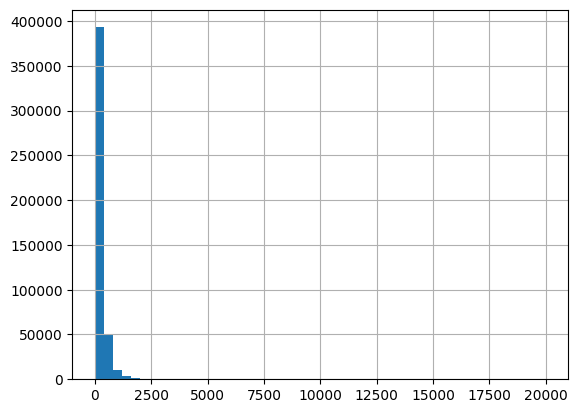

In [ ]:
df_ticket_listing['TICKET_LISTING_PRICE'].hist(bins=50)

In [ ]:
print("Ticket Listing Columns: ", df_ticket_listing.columns.tolist())
print("Seat Coordinates Columns: ", df_seat_coordinates.columns.tolist())

Ticket Listing Columns:  ['GAME_ID', 'GAME_DATE', 'GAME_TIME', 'SEASON_ID', 'SEASON_STAGE', 'VISITOR_TEAM_TRI_CODE', 'HOME_TEAM_TRI_CODE', 'SECTION_CATEGORY', 'SECTION_GROUP', 'SECTION_LEVEL', 'SECTION_NAME', 'ROW_NAME', 'SEAT_NAME', 'SECTION_ROW_SEAT_NAME', 'TICKET_LISTING_PRICE', 'DAYS_INVENTORY_LEAD_TIME', 'INVENTORY_LEAD_TIME_CATEGORY', 'distance_from_center_x', 'SECTION_NUM', 'ANEMITIES', 'GAME_DAY', 'distance_from_center_y', 'distance_from_center']
Seat Coordinates Columns:  ['HOME_TEAM_TRI_CODE', 'SECTION_ROW_SEAT_NAME', 'SEAT_CENTER_X', 'SEAT_CENTER_Y']


In [ ]:
df = pd.merge(df_ticket_listing, df_seat_coordinates, on=['HOME_TEAM_TRI_CODE', 'SECTION_ROW_SEAT_NAME'])
df = df.dropna()

In [ ]:
df['GAME_DATE'] = pd.to_datetime(df['GAME_DATE'])
df['GAME_YEAR'] = df['GAME_DATE'].dt.year
df['GAME_MONTH'] = df['GAME_DATE'].dt.month
df['GAME_DAY'] = df['GAME_DATE'].dt.day
df['GAME_WEEK'] = df['GAME_DATE'].dt.isocalendar().week
df = df.drop('GAME_DATE', axis=1)

In [ ]:
def encode_period_of_day(time_str):
    hour = pd.to_datetime(time_str).hour
    if 5 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 17:
        return 'afternoon'
    elif 17 <= hour < 21:
        return 'evening'
    else:
        return 'night'

df['PERIOD_OF_DAY'] = df['GAME_TIME'].apply(encode_period_of_day)
df['GAME_TIME_IN_MINUTES'] = df['GAME_TIME'].str.split(':').apply(
    lambda x: int(x[0]) * 60 + int(x[1]) if x[0] != 'nan' else 0
)

df = df.drop('GAME_TIME', axis=1)

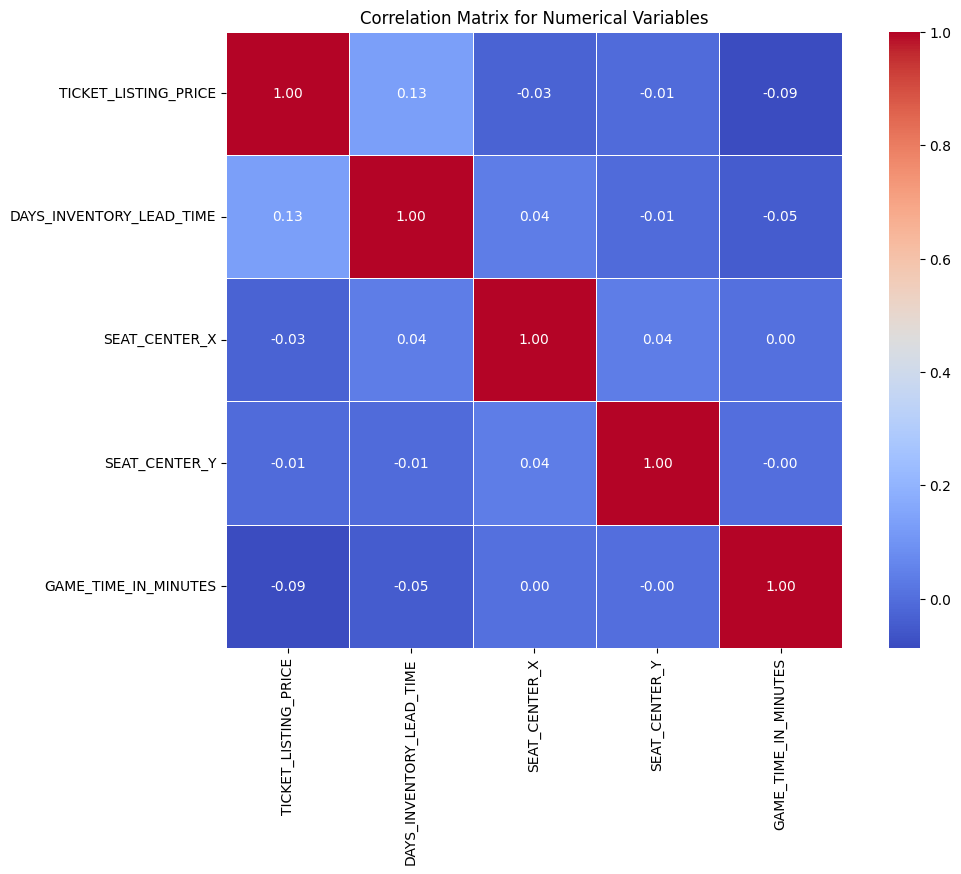

In [ ]:
numerical_columns = ['TICKET_LISTING_PRICE', 'DAYS_INVENTORY_LEAD_TIME', 'SEAT_CENTER_X', 'SEAT_CENTER_Y', 'GAME_TIME_IN_MINUTES']

numerical_df_for_corr = df[numerical_columns]

# Calculate the correlation matrix on the numerical subset
corr_matrix = numerical_df_for_corr.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, square=True, linewidths=.5)
plt.title('Correlation Matrix for Numerical Variables')
plt.show()

In [ ]:
# df = df.drop('GAME_ID', axis=1)

# **IMPORTANT PART**

In [ ]:
# distance of each seat from a reference point
# df['SEAT_DISTANCE'] = np.sqrt((df['SEAT_CENTER_X'] - 2500)**2 + (df['SEAT_CENTER_Y'] - 2500)**2)

# attractiveness scores
team_attractiveness = {
    'GSW': 1.0,  # home team
    'LAL': 0.9, 'MIA': 0.9, 'BKN': 0.9, 'MIL': 0.9, 'PHX': 0.9, 'BOS': 0.9, 'LAC': 0.9, # playoff conference finals teams (2020 - 2022)
    'DEN': 0.8, 'NYK': 0.8, 'UTA': 0.8,
    'MEM': 0.8, 'POR': 0.8, 'ATL': 0.8,
    'DAL': 0.8, 'WAS': 0.8, 'PHI': 0.8,  # recent playoff teams (2020 - 2022)
    # Teams that didn't make playoffs or lower performance (2020 - 2022)
    'ORL': 0.7, 'DET': 0.7, 'CLE': 0.7, 'IND': 0.7, 'CHA': 0.7, 'MIN': 0.7, 'NOP': 0.7,
    'OKC': 0.7, 'TOR': 0.7,  'HOU': 0.7, 'CHI': 0.7, 'SAS': 0.8, 'SAC': 0.8,
}

# matchup attractiveness as the average of both home and vistors team scores
df['MATCHUP_ATTRACTIVENESS'] = (df['VISITOR_TEAM_TRI_CODE'].map(team_attractiveness) +
                                 df['HOME_TEAM_TRI_CODE'].map(team_attractiveness)) / 2

# popularity scores (based on rank in social media following in early 2023)
team_popularity = {
    'GSW': 1,  # home team and very high in social media following
    'LAL': 1, 'CHI': 2, 'CLE': 3, 'HOU': 4,  # top 5 in following
    #next top 10 in following
    'MIA': 5, 'BOS': 6, 'SAS': 7, 'OKC': 8, 'NYK': 9, 'SAC': 10, 'LAC': 11,
    'DAL': 12, 'BKN': 13, 'MIL': 14,
    #next 5 in following
    'TOR': 15, 'PHI': 16, 'WAS': 17, 'IND': 18, 'POR': 19,
    #bottom 10 in following
    'PHX': 20, 'ORL': 21, 'MIN': 22, 'NOP': 23,
    'UTA': 24, 'ATL': 25, 'DEN': 26, 'MEM': 27, 'CHA': 28, 'DET': 29
}

# team rivalry (have played against them in the playoffs between 2015 - 2022 including play in)
team_rivalry = {
'ATL':  0,
'BKN':  0,
'BOS':  1,
'CHA':  0,
'CHI':  0,
'CLE':  1,
'DAL':  1,
'DEN':  1,
'DET':  0,
'HOU':  1,
'IND':  0,
'LAC':  1,
'LAL':  1,
'MEM':  1,
'MIA':  0,
'MIL':  0,
'MIN':  0,
'NOP':  1,
'NYK':  0,
'OKC':  1,
'ORL':  0,
'PHI':  0,
'PHX':  0,
'POR':  1,
'SAC':  0,
'SAS':  1,
'TOR':  1,
'UTA':  1,
'WAS':  0
}

df['TEAM_RIVALRY'] = df['VISITOR_TEAM_TRI_CODE'].map(team_rivalry)

# number of games against the respective team (in the database)
team_scarcity = {
'ATL':  2,
'BKN':  2,
'BOS':  2,
'CHA':  2,
'CHI':  2,
'CLE':  2,
'DAL':  3,
'DEN':  3,
'DET':  2,
'HOU':  3,
'IND':  2,
'LAC':  4,
'LAL':  4,
'MEM':  3,
'MIA':  2,
'MIL':  2,
'MIN':  4,
'NOP':  4,
'NYK':  2,
'OKC':  4,
'ORL':  2,
'PHI':  2,
'PHX':  4,
'POR':  4,
'SAC':  4,
'SAS':  4,
'TOR':  2,
'UTA':  4,
'WAS':  2
}

# matchup attractiveness as inverse of team scarcity
df['TEAM_SCARCITY'] = 1 / (1 + df['VISITOR_TEAM_TRI_CODE'].map(team_scarcity))

# number of all stars on each team (using 2022-2023 rosters)
player_popularity = {
    'BOS': 2,
    'LAL': 2,
    'GSW': 1,
    'DAL': 2,
    'MIN': 1,
    'PHI': 1,
    'SAC': 2,
    'LAC': 1,
    'IND': 1,
    'MEM': 2,
    'DEN': 1,
    'NYK': 1,
    'NOP': 1,
    'MIA': 1,
    'MIL': 2,
    'CHI': 1,
    'PHX': 1,
    'OKC': 1,
    'POR': 1,
    'UTA': 1,
    'CLE': 1,
    'TOR': 1,
    'HOU': 0,
    'ATL': 0,
    'CHA': 0,
    'DET': 0,
    'ORL': 0,
    'WAS': 0,
    'BKN': 0,
    'SAS':0


}

# matchup attractiveness as the average of both home and vistors team scores (based on team popularity)
df['TEAM_POPULARITY'] = (1/(1+df['VISITOR_TEAM_TRI_CODE'].map(team_popularity)) +
                                 (1/1+df['HOME_TEAM_TRI_CODE'].map(team_popularity))) / 2

# player attractiveness as the average of both home and vistors team scores (based on number of all stars)
df['PLAYER_ATTRACTIVENESS'] = (df['VISITOR_TEAM_TRI_CODE'].map(player_popularity) +
                                 df['HOME_TEAM_TRI_CODE'].map(player_popularity)) / 2

# map day of week to inherent scores because weekends should be higher value
day_of_week_mapping = {
    'Sunday': 0.7,
    'Saturday': 0.8,
    'Friday': 0.8,
    'Thursday': 0.6,
    'Wednesday': 0.6,
    'Tuesday': 0.5,
    'Monday': 0.5
}
df['GAME_WEEK'] = df['GAME_WEEK'].map(day_of_week_mapping)


# normalize
def normalize(values):
    return (values - values.min()) / (values.max() - values.min())

df['NORM_DAY_OF_WEEK'] = normalize(df[['GAME_WEEK']])
df['NORM_MATCHUP_ATTRACTIVENESS'] = normalize(df[['MATCHUP_ATTRACTIVENESS']])
df['NORM_TEAM_POPULARITY'] = normalize(df[['TEAM_POPULARITY']])
df['NORM_PLAYER_ATTRACTIVENESS'] = normalize(df[['PLAYER_ATTRACTIVENESS']])
df['NORM_TEAM_SCARCITY'] = normalize(df[['TEAM_SCARCITY']])
df['NORM_TEAM_RIVALRY'] = normalize(df[['TEAM_RIVALRY']])
df['NORM_SEAT_DISTANCE'] = normalize(df[['distance_from_center']])


# weights based on the importance of each factor
weights = {
    'day of week': 0.1,
    'matchup': 0.25,
    'popularity': 0.2,
    'players': 0.2,
    'scarcity': 0.1,
    'rivalry': 0.05,
    'distance': 0.1
}

# game quality score calculation excluding price
df['GAME_QUALITY_SCORE'] = (
    df['NORM_MATCHUP_ATTRACTIVENESS'] * weights['matchup'] ++
    df['NORM_PLAYER_ATTRACTIVENESS'] * weights['players'] +
    df['NORM_DAY_OF_WEEK'] * weights['day of week'] +
    df['NORM_TEAM_POPULARITY'] * weights['popularity'] +
    df['NORM_TEAM_SCARCITY'] * weights['scarcity'] +
    df['NORM_TEAM_RIVALRY'] * weights['rivalry'] +
    df['NORM_SEAT_DISTANCE'] * weights['distance']
)


# scale the seat quality score to a range of 0-100
df['GAME_QUALITY_SCORE_SCALED'] = 100 * (df['GAME_QUALITY_SCORE'] - df['GAME_QUALITY_SCORE'].min()) / (df['GAME_QUALITY_SCORE'].max() - df['GAME_QUALITY_SCORE'].min())

In [ ]:
# columns:
known_categorical_cols = ['SEASON_STAGE', 'SECTION_CATEGORY', 'SECTION_GROUP',
                          'SECTION_NAME', 'ROW_NAME', 'SEAT_NAME',
                          'PERIOD_OF_DAY']

# columns not in known categorical columns and are of a numeric type can be considered numerical
automatic_numerical_cols = [col for col in df.columns if df[col].dtype in ['int64', 'float64'] and col not in known_categorical_cols and col != 'TICKET_LISTING_PRICE']

# check if there are any columns that have not been categorized
uncategorized_cols = [col for col in df.columns if col not in known_categorical_cols + automatic_numerical_cols + ['TICKET_LISTING_PRICE']]

print(f'Known Categorical Columns: {known_categorical_cols}')
print(f'Automatically Detected Numerical Columns: {automatic_numerical_cols}')
print(f'Uncategorized Columns: {uncategorized_cols}')

known_categorical_cols.extend([
    'VISITOR_TEAM_TRI_CODE',
    'HOME_TEAM_TRI_CODE',
    'SECTION_LEVEL',
    'SECTION_ROW_SEAT_NAME',
    'INVENTORY_LEAD_TIME_CATEGORY',
    'GAME_YEAR',
    'GAME_MONTH',
    'GAME_DAY'
])

categorical_cols = known_categorical_cols

print(f'Updated Categorical Columns: {categorical_cols}')

Known Categorical Columns: ['SEASON_STAGE', 'SECTION_CATEGORY', 'SECTION_GROUP', 'SECTION_NAME', 'ROW_NAME', 'SEAT_NAME', 'PERIOD_OF_DAY']
Automatically Detected Numerical Columns: ['GAME_ID', 'SEASON_ID', 'DAYS_INVENTORY_LEAD_TIME', 'distance_from_center_x', 'SECTION_NUM', 'ANEMITIES', 'distance_from_center_y', 'distance_from_center', 'SEAT_CENTER_X', 'SEAT_CENTER_Y', 'GAME_WEEK', 'GAME_TIME_IN_MINUTES', 'MATCHUP_ATTRACTIVENESS', 'TEAM_RIVALRY', 'TEAM_SCARCITY', 'TEAM_POPULARITY', 'PLAYER_ATTRACTIVENESS', 'NORM_DAY_OF_WEEK', 'NORM_MATCHUP_ATTRACTIVENESS', 'NORM_TEAM_POPULARITY', 'NORM_PLAYER_ATTRACTIVENESS', 'NORM_TEAM_SCARCITY', 'NORM_TEAM_RIVALRY', 'NORM_SEAT_DISTANCE', 'GAME_QUALITY_SCORE', 'GAME_QUALITY_SCORE_SCALED']
Uncategorized Columns: ['VISITOR_TEAM_TRI_CODE', 'HOME_TEAM_TRI_CODE', 'SECTION_LEVEL', 'SECTION_ROW_SEAT_NAME', 'INVENTORY_LEAD_TIME_CATEGORY', 'GAME_DAY', 'GAME_YEAR', 'GAME_MONTH']
Updated Categorical Columns: ['SEASON_STAGE', 'SECTION_CATEGORY', 'SECTION_GROUP', 

In [ ]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])


categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, automatic_numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ]
)
df_processed = preprocessor.fit_transform(df)

# Linear Regression

In [ ]:
X = df.drop('TICKET_LISTING_PRICE', axis=1)
y = df['TICKET_LISTING_PRICE'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


X_train_processed = preprocessor.fit_transform(X_train)

X_test_processed = preprocessor.transform(X_test)

linear_reg = LinearRegression()
linear_reg.fit(X_train_processed, y_train)


y_train_pred_linear = linear_reg.predict(X_train_processed)
y_test_pred_linear = linear_reg.predict(X_test_processed)

train_rmse_linear = mean_squared_error(y_train, y_train_pred_linear, squared=False)
test_rmse_linear = mean_squared_error(y_test, y_test_pred_linear, squared=False)

print(f'Linear Regression Training RMSE: {train_rmse_linear}')
print(f'Linear Regression Test RMSE: {test_rmse_linear}')
r_squared = linear_reg.score(X_test_processed, y_test)
print(f'R-squared: {r_squared}')




Linear Regression Training RMSE: 116.33331832825445
Linear Regression Test RMSE: 124.35986316152957
R-squared: 0.7658333702665474


# **Random Forest Regressor**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

random_forest = RandomForestRegressor(n_estimators=10, random_state=42, n_jobs=-1)

# transform the data
X_train_prepared = preprocessor.fit_transform(X_train)
X_test_prepared = preprocessor.transform(X_test)

random_forest.fit(X_train_prepared, y_train)

# predict on training and test data
y_train_pred = random_forest.predict(X_train_prepared)
y_test_pred = random_forest.predict(X_test_prepared)

# RMSE for training and test sets
train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)

r_squared = r2_score(y_test, y_test_pred)

print(f'Random Forest Training RMSE: {train_rmse}')
print(f'Random Forest Test RMSE: {test_rmse}')
print(f'Random Forest R^2: {r_squared}')


Random Forest Training RMSE: 26.851295981133397
Random Forest Test RMSE: 60.28056668202089
Random Forest R^2: 0.9449801772349583


In [ ]:
numerical_feature_names = automatic_numerical_cols

# categorical feature names from OneHotEncoder
categorical_feature_names = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out()

# combine all feature names
feature_names = list(numerical_feature_names) + list(categorical_feature_names)

In [ ]:
def plot_top_feature_importances(model, feature_names, top_n=15):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]


    top_indices = indices[:top_n]

    # align feature names for the top_n features
    aligned_feature_names = [feature_names[i] for i in top_indices]

    plt.figure(figsize=(12, 8))
    plt.title("Top 15 Feature Importances")
    plt.barh(range(len(top_indices)), importances[top_indices], color='b', align='center')
    plt.yticks(range(len(top_indices)), aligned_feature_names)
    plt.gca().invert_yaxis()  # Invert axis to have the most important at the top
    plt.xlabel('Relative Importance')
    plt.show()

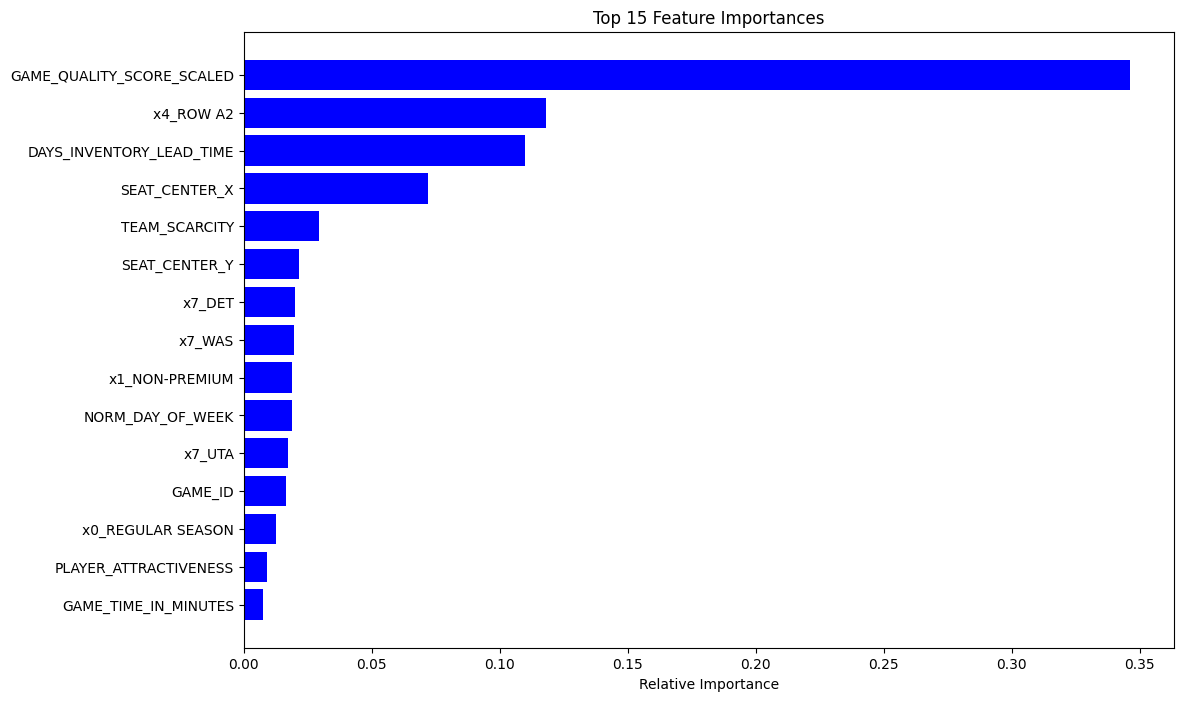

In [ ]:
plot_top_feature_importances(random_forest, feature_names, top_n=15)

# **XGBoost**

In [ ]:
import xgboost as xgb
dtrain = xgb.DMatrix(X_train_processed, label=y_train)
dtest = xgb.DMatrix(X_test_processed, label=y_test)

# parameters
params = {
    'max_depth': 6,
    'min_child_weight': 1,
    'eta': 0.3,
    'subsample': 1,
    'colsample_bytree': 1,
    'objective': 'reg:squarederror',
}

model = xgb.train(params, dtrain, num_boost_round=100)

# Predict
y_pred = model.predict(dtest)

# Evaluate
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'XGBoost RMSE: {rmse}')

r_squared = r2_score(y_test, y_pred)
print(f'XGBoost R^2: {r_squared}')

XGBoost RMSE: 101.03796216354041
XGBoost R^2: 0.9080619410513628
